In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
%run -i 'functions.py'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('final_data.csv')

In [3]:
data = drop(data, 'Unnamed: 0')

In [168]:
data.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,minor,2,1,Monday,midnight,A_road,single_lane,20,yield,0,ped_light,1,clear,1,0,0,1,1,"(51.529746, -0.102474)",taxi,0,turn_left,0,none,on_road,front,1,work,1,40,7,hybrid/electric,6,low,city,poor,winter
1,severe,2,1,Monday,late_night,B_road,two_lane,30,traffic_light,0,ped_light,1,rain,0,0,0,1,1,"(51.530179, 0.037828)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,27,6,petrol,1,middle,city,good,winter
2,severe,2,1,Monday,early_morning,C_road,single_lane,30,yield,0,none,1,clear,1,0,0,1,1,"(51.514545, -0.199239)",taxi,0,exiting,0,none,on_road,front,1,work,1,66,10,electric,5,low,city,poor,winter
3,minor,3,1,Monday,early_morning,A_road,one_way,30,yield,0,none,1,clear,1,0,0,1,1,"(51.475091, -0.032886)",taxi,0,driving,0,none,on_road,back,1,work,2,36,7,hybrid/electric,2,low,city,poor,winter
4,minor,2,1,Monday,midnight,Unclassified,single_lane,30,yield,0,cross_walk,1,clear,1,0,0,1,1,"(51.56325, -0.311872)",car,0,turn_right,0,none,on_road,front,1,Unknown,1,24,5,petrol,9,low,city,okay,winter


## Prelude
* `accident_severity` is the target
* Data needs to be prepared differently for different models
    * RandomForestClassifier will take in categorical variables without the use of dummy variables, however, all values will need to be numerical.
* Feature selection needs to be completed
* Need to check if there are any valuable polynomial features

## Preparation of data for RFC
* Use `pd.factorize(data[column])[0] + 1`



In [4]:
# Not sure how to turn this into a function
data['accident_severity'] = factorize(data, 'accident_severity')
data['day_of_week'] = factorize(data, 'day_of_week')
data['time'] = factorize(data, 'time')
data['road_class'] = factorize(data, 'road_class')
data['junction_control'] = factorize(data, 'junction_control')
data['ped_crossway'] = factorize(data, 'ped_crossway')
data['weather_conditions'] = factorize(data, 'weather_conditions')
data['vehicle_type'] = factorize(data, 'vehicle_type')
data['vehicle_activity'] = factorize(data, 'vehicle_activity')
data['vehicle_action'] = factorize(data, 'vehicle_action')
data['vehicle_loc_post_impact'] = factorize(data, 'vehicle_loc_post_impact')
data['impact_type'] = factorize(data, 'impact_type')
data['journey_purpose_of_driver'] = factorize(data, 'journey_purpose_of_driver')
data['propulsion'] = factorize(data, 'propulsion')
data['socioeconomic_status'] = factorize(data, 'socioeconomic_status')
data['driver_residence'] = factorize(data, 'driver_residence')
data['car_status'] = factorize(data, 'car_status')
data['season'] = factorize(data, 'season')
data['road_type'] = factorize(data, 'road_type')

In [170]:
data.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,road_class,road_type,speed_limit,junction_control,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,in_restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,1,2,1,1,1,1,1,20,1,0,1,1,1,1,0,0,1,1,"(51.529746, -0.102474)",1,0,1,0,1,1,1,1,1,1,40,7,1,6,1,1,1,1
1,2,2,1,1,2,2,2,30,2,0,1,1,2,0,0,0,1,1,"(51.530179, 0.037828)",2,0,2,0,1,1,1,1,2,1,27,6,2,1,2,1,2,1
2,2,2,1,1,3,3,1,30,1,0,2,1,1,1,0,0,1,1,"(51.514545, -0.199239)",1,0,3,0,1,1,1,1,1,1,66,10,3,5,1,1,1,1
3,1,3,1,1,3,1,3,30,1,0,2,1,1,1,0,0,1,1,"(51.475091, -0.032886)",1,0,4,0,1,1,2,1,1,2,36,7,1,2,1,1,1,1
4,1,2,1,1,1,4,1,30,1,0,3,1,1,1,0,0,1,1,"(51.56325, -0.311872)",2,0,2,0,1,1,1,1,2,1,24,5,2,9,1,1,3,1


In [6]:
rf_data = drop(data, ['coordinates', 'age_bin_driver'])

### Baseline RandomForestClassifier Model

In [7]:
# Instantiating RFC
rfc = RandomForestClassifier(random_state=42)

In [8]:
# Going to run my first baseline model using cross validation
# Will use explicit training and test data for future runs
# Baseline model
X = rf_data.drop(columns=['accident_severity'], axis=1)
y = rf_data['accident_severity']

In [174]:
rfc.fit(X,y)
cross_validate(rfc, X, y, cv=3)

{'fit_time': array([7.09886003, 7.10601807, 7.29964304]),
 'score_time': array([0.64617014, 0.68594599, 0.86415005]),
 'test_score': array([0.80996359, 0.81404849, 0.81120682])}

Interesting... Time to look at the model but with TTS

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.8111494819930932

In [115]:
# Precision scores with different hyperparameters
print('Micro:', precision_score(y_test, test_pred, average='micro'))
print('Macro:', precision_score(y_test, test_pred, average='macro'))
print('Weighted:', precision_score(y_test, test_pred, average='weighted'))

Micro: 0.8111494819930932
Macro: 0.45370412607035066
Weighted: 0.7578150181365929


In [116]:
# Recall scores with different hyperparameters
print('Micro:', recall_score(y_test, test_pred, average='micro'))
print('Macro:', recall_score(y_test, test_pred, average='macro'))
print('Weighted:', recall_score(y_test, test_pred, average='weighted'))

Micro: 0.8111494819930932
Macro: 0.34565251057959184
Weighted: 0.8111494819930932


In [175]:
base_recall = 0.8111494819930932
base_f1 = 0.8111494819930932

In [117]:
# F1 scores with different hyperparameters
print('Micro:', f1_score(y_test, test_pred, average='micro'))
print('Macro:', f1_score(y_test, test_pred, average='macro'))
print('Weighted:', f1_score(y_test, test_pred, average='weighted'))

Micro: 0.8111494819930932
Macro: 0.3254157590729338
Weighted: 0.7386946393245274


### Now going to eliminate the class imbalance and view the results

In [9]:
X_r, y_r = SMOTE().fit_sample(X, y)

In [120]:
rfc1 = RandomForestClassifier(random_state=42)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [121]:
rfc1.fit(X_train, y_train)
test_pred = rfc1.predict(X_test)

In [123]:
# Precision scores with different hyperparameters
print('Micro:', precision_score(y_test, test_pred, average='micro'))
print('Macro:', precision_score(y_test, test_pred, average='macro'))
print('Weighted:', precision_score(y_test, test_pred, average='weighted'))

Micro: 0.8923235758532734
Macro: 0.8920849319893557
Weighted: 0.8924897354839532


In [124]:
# Recall scores with different hyperparameters
print('Micro:', recall_score(y_test, test_pred, average='micro'))
print('Macro:', recall_score(y_test, test_pred, average='macro'))
print('Weighted:', recall_score(y_test, test_pred, average='weighted'))

Micro: 0.8923235758532734
Macro: 0.8920242442418186
Weighted: 0.8923235758532734


In [176]:
base_fix_recall = 0.8923235758532734
base_fix_f1 = 0.8923235758532734

In [125]:
# F1 scores with different hyperparameters
print('Micro:', f1_score(y_test, test_pred, average='micro'))
print('Macro:', f1_score(y_test, test_pred, average='macro'))
print('Weighted:', f1_score(y_test, test_pred, average='weighted'))

Micro: 0.8923235758532734
Macro: 0.8919205474319316
Weighted: 0.892273041926272


In [126]:
rfc1.fit(X_r,y_r)
cross_validate(rfc1, X_r, y_r, cv=3)

{'fit_time': array([18.88502192, 20.44651008, 19.88726401]),
 'score_time': array([1.70779705, 1.93683672, 1.9233942 ]),
 'test_score': array([0.75290602, 0.91586197, 0.91081514])}

### Looking into RFECV (recursive feature selection)

In [132]:
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X,y)
rfe1 = RFECV(estimator=rfc1, step=1, min_features_to_select=10, cv=3)

In [133]:
rfe1.fit(X,y)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=10, n_jobs=None, scoring=None, step=1, verbose=0)

In [134]:
cols = list(X_r.columns)

In [136]:
feature_importance = pd.DataFrame(rfe1.ranking_)
feature_importance['variable'] = cols

In [62]:
feature_importance

,0,variable
0,1,number_of_vehicles
1,1,number_of_casualties
2,1,day_of_week
3,1,time
4,1,road_class
5,1,road_type
6,1,speed_limit
7,1,junction_control
8,3,crossguard
9,1,ped_crossway


In [66]:
variables = feature_importance[feature_importance[0] == 1]

In [68]:
len(variables)

29

Will be using the features ranked 1 in a GridSearch for my RandomForestClassifier

---

### Re-running base RFC and then tuning via GridSearchCV

In [10]:
# slim_Xr is the base model with the base model RFE selected variables
slim_Xr = X_r[['number_of_vehicles','number_of_casualties','day_of_week','time','road_class',
               'road_type', 'speed_limit', 'junction_control', 'ped_crossway', 'light_conditions',
               'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
               'did_police_officer_attend_scene_of_accident', 'vehicle_type','vehicle_activity',
               'in_restricted_lane', 'vehicle_action', 'vehicle_loc_post_impact', 'impact_type',
               'journey_purpose_of_driver', 'sex_of_driver','age_driver', 'propulsion',
               'age_of_vehicle', 'socioeconomic_status', 'driver_residence', 'car_status', 'season']]
X_train, X_test, y_train, y_test = train_test_split(slim_Xr, y_r, test_size=0.2, random_state=42)
rfc3 = RandomForestClassifier(random_state=42)
rfc3.fit(X_train, y_train)
rfe1_pred = rfc3.predict(X_test)

In [138]:
# Recall scores over different hyper parameters
print('Micro:', recall_score(y_test, rfe1_pred, average='micro'))
print('Macro:', recall_score(y_test, rfe1_pred, average='macro'))
print('Weighted:', recall_score(y_test, rfe1_pred, average='weighted'))

Micro: 0.8938722215474311
Macro: 0.8935628602924558
Weighted: 0.8938722215474311


In [139]:
# F1 scores over different hyper parameters
print('Micro:', f1_score(y_test, rfe1_pred, average='micro'))
print('Macro:', f1_score(y_test, rfe1_pred, average='macro'))
print('Weighted:', f1_score(y_test, rfe1_pred, average='weighted'))

Micro: 0.8938722215474311
Macro: 0.8935166959770694
Weighted: 0.893867800238051


In [177]:
base_trim_recall = 0.8938722215474311
base_trim_f1 = 0.8938722215474311

Seems that my base model has improved in the area I wanted it to. My goal is to make sure that the model classifies the incident as a serious incident. I would rather have the model tell local authorities that there was a serious incident and have them show up to be fortunately surprised that the accident was actually very minor, than to undermine the event.

In [11]:
feature_review = pd.DataFrame(rfc3.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

In [18]:
variables = list(feature_review.index)
imps = list(feature_review['importance'])

In [26]:
index = list(range(0,29))
feats = pd.DataFrame(index)

In [27]:
feats['variables'] = variables
feats['importance'] = imps

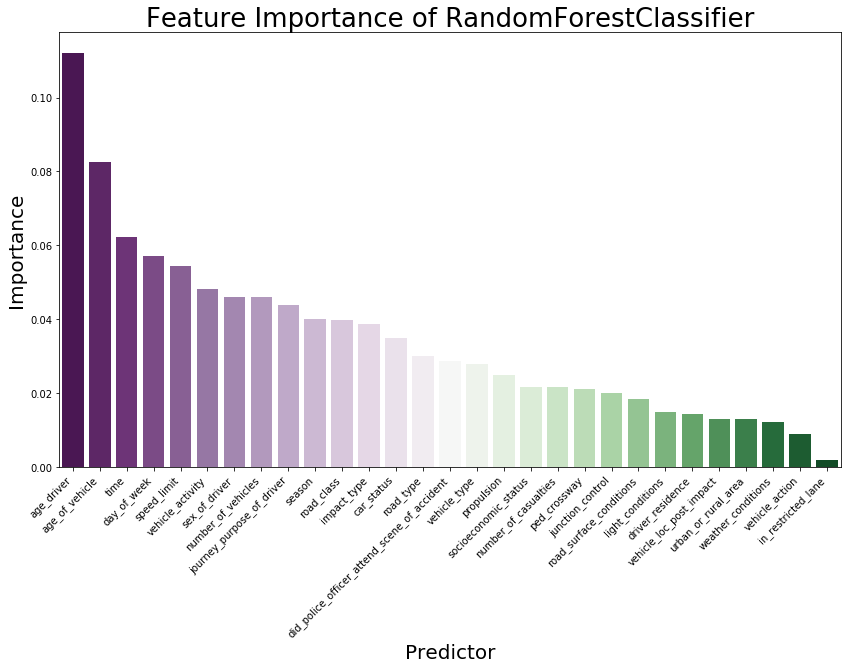

In [33]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=list(feats['variables']), y=feats['importance'], palette='PRGn')    
ax.set_xticklabels(ax.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
plt.xlabel('Predictor', size=20)
plt.ylabel('Importance', size=20)
plt.title('Feature Importance of RandomForestClassifier', size=26)
plt.show()

Could hypothesize about what might happen to the model if I reduced some of the noise by removing features of low importance.

In [152]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [153]:
# Instantiate a GridSearch to tune model
gridsearch = GridSearchCV(estimator=rfc3, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(slim_Xr, y_r)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [154]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

### Best params
* criterion = 'entropy'
* min_samples_leaf = 2
* min_samples_split = 3

In [159]:
X_train, X_test, y_train, y_test = train_test_split(slim_Xr, y_r, random_state=42, test_size=0.5)

In [160]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2,
                                random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [161]:
refined_pred = rfc_ref.predict(X_test)

In [162]:
# Recall scores with different hyperparameters
print('Recall Micro:', recall_score(y_test, refined_pred, average='micro'))
print('Recall Macro:', recall_score(y_test, refined_pred, average='macro'))
print('Recall Weighted:', recall_score(y_test, refined_pred, average='weighted'))
# F1 scores with different hyperparameters
print('F1 Micro:', f1_score(y_test, refined_pred, average='micro'))
print('F1 Macro:', f1_score(y_test, refined_pred, average='macro'))
print('F1 Weighted:', f1_score(y_test, refined_pred, average='weighted'))

Recall Micro: 0.8704587690850125
Recall Macro: 0.8702373763278181
Recall Weighted: 0.8704587690850125
F1 Micro: 0.8704587690850126
F1 Macro: 0.8696963394269472
F1 Weighted: 0.8699203638081878


In [178]:
refined_recall = 0.8704587690850125
refined_f1 = 0.8704587690850126

Going to try to remove some features and see the performance.

In [163]:
slim_Xrn = slim_Xr.copy()
slim_Xrn.drop(columns=['age_driver'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(slim_Xrn, y_r, random_state=42)
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2,
                                random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)
refined_pred = rfc_ref.predict(X_test)
# Recall scores with different hyperparameters
print('Recall Micro:', recall_score(y_test, refined_pred, average='micro'))
print('Recall Macro:', recall_score(y_test, refined_pred, average='macro'))
print('Recall Weighted:', recall_score(y_test, refined_pred, average='weighted'))
# F1 scores with different hyperparameters
print('F1 Micro:', f1_score(y_test, refined_pred, average='micro'))
print('F1 Macro:', f1_score(y_test, refined_pred, average='macro'))
print('F1 Weighted:', f1_score(y_test, refined_pred, average='weighted'))

Recall Micro: 0.875088060245354
Recall Macro: 0.8743345370829078
Recall Weighted: 0.875088060245354
F1 Micro: 0.8750880602453539
F1 Macro: 0.8738291030756761
F1 Weighted: 0.8745531750845708


In [164]:
slim_Xrn.drop(columns=['road_surface_conditions', 'light_conditions','urban_or_rural_area',
                       'driver_residence', 'vehicle_loc_post_impact', 'weather_conditions',
                       'vehicle_action', 'in_restricted_lane'], axis=1, inplace=True)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(slim_Xrn, y_r, random_state=42)
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2,
                                random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)
refined_pred = rfc_ref.predict(X_test)
# Recall scores with different hyperparameters
print('Recall Micro:', recall_score(y_test, refined_pred, average='micro'))
print('Recall Macro:', recall_score(y_test, refined_pred, average='macro'))
print('Recall Weighted:', recall_score(y_test, refined_pred, average='weighted'))
# F1 scores with different hyperparameters
print('F1 Micro:', f1_score(y_test, refined_pred, average='micro'))
print('F1 Macro:', f1_score(y_test, refined_pred, average='macro'))
print('F1 Weighted:', f1_score(y_test, refined_pred, average='weighted'))

Recall Micro: 0.8648609255435443
Recall Macro: 0.8640337596766926
Recall Weighted: 0.8648609255435443
F1 Micro: 0.8648609255435442
F1 Macro: 0.8633544713691474
F1 Weighted: 0.8641159681206193


Can't seem to break it!

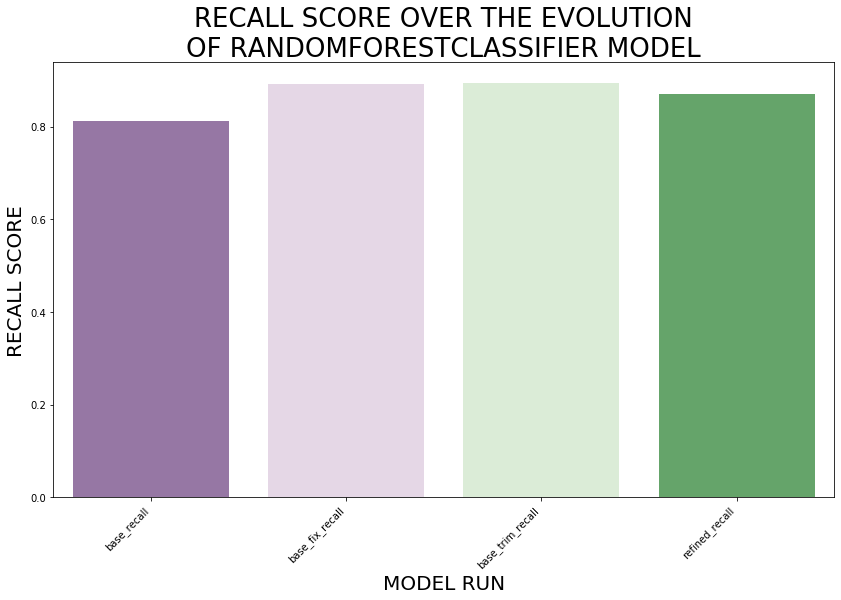

In [182]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=['base_recall','base_fix_recall', 'base_trim_recall',
                        'refined_recall'],
                 y=[base_recall, base_fix_recall, base_trim_recall, refined_recall], palette='PRGn')    
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.xlabel('MODEL RUN', size=20)
plt.ylabel('RECALL SCORE', size=20)
plt.title('RECALL SCORE OVER THE EVOLUTION\nOF RANDOMFORESTCLASSIFIER MODEL', size=26)
plt.show()

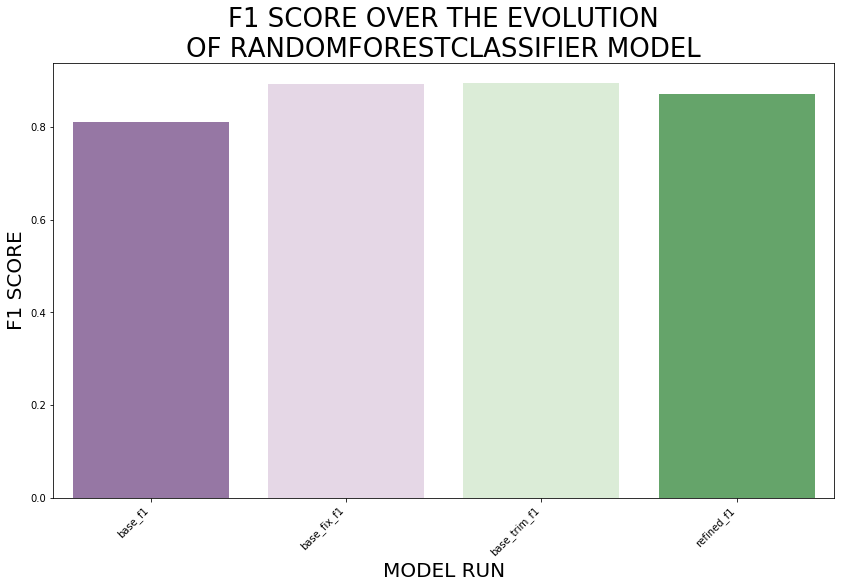

In [183]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=['base_f1','base_fix_f1', 'base_trim_f1',
                        'refined_f1'],
                 y=[base_f1, base_fix_f1, base_trim_f1, refined_f1], palette='PRGn')    
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.xlabel('MODEL RUN', size=20)
plt.ylabel('F1 SCORE', size=20)
plt.title('F1 SCORE OVER THE EVOLUTION\nOF RANDOMFORESTCLASSIFIER MODEL', size=26)
plt.show()